In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import tensorflow as tf


In [ ]:
ts_train = pd.read_csv('oil_price_train.csv')
ts_test = pd.read_csv('oil_price_test.csv')

In [ ]:
ts_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               12 non-null     object 
 1   eur_usd            12 non-null     float64
 2   inventory          12 non-null     float64
 3   production         12 non-null     float64
 4   rigs               12 non-null     float64
 5   inflation          12 non-null     float64
 6   price_6m_rolling   12 non-null     float64
 7   price_12m_rolling  12 non-null     float64
 8   price_6m_lag       12 non-null     float64
 9   current_price      12 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [ ]:
ts_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               216 non-null    object 
 1   eur_usd            216 non-null    float64
 2   inventory          216 non-null    float64
 3   production         216 non-null    float64
 4   rigs               216 non-null    float64
 5   inflation          216 non-null    float64
 6   price_6m_rolling   216 non-null    float64
 7   price_12m_rolling  216 non-null    float64
 8   price_6m_lag       216 non-null    float64
 9   current_price      216 non-null    float64
dtypes: float64(9), object(1)
memory usage: 17.0+ KB


In [ ]:
ts_train

,date,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
0,2006-01-01,1.212550,304091.640553,5048.0,1473.0,4.0,62.675215,58.045640,58.995500,65.485000
1,2006-02-01,1.193974,309749.739796,5032.0,1533.0,3.6,62.116187,59.169149,64.985217,61.631053
2,2006-03-01,1.202843,322816.124424,5027.0,1551.0,3.4,61.632612,59.877349,65.586667,62.685217
3,2006-04-01,1.227325,328993.590476,5082.0,1597.0,3.5,62.829893,61.249402,62.260000,69.443684
4,2006-05-01,1.276745,329557.308756,5151.0,1635.0,4.2,64.916825,63.000259,58.322500,70.844091
...,...,...,...,...,...,...,...,...,...,...
211,2023-08-01,1.091000,433457.672811,13047.0,647.0,3.7,75.302727,78.289464,76.832632,81.386087
212,2023-09-01,1.067175,417522.057143,13177.0,631.0,3.7,78.025530,78.720039,73.088182,89.425000
213,2023-10-01,1.056457,421850.907834,13149.0,623.0,3.2,79.057731,78.557833,79.446316,85.639524
214,2023-11-01,1.081930,443440.838095,13281.0,619.0,3.1,80.075534,78.000710,71.578182,77.685000


In [ ]:
ts_test

,date,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
0,2024-01-01,1.089890,426466.843318,12554.0,620.0,3.1,80.031332,77.287575,76.069500,74.152381
1,2024-02-01,1.079300,441000.014778,13102.0,622.0,3.2,79.371809,77.337268,81.386087,77.428947
2,2024-03-01,1.087019,447962.138249,13171.0,625.0,3.5,78.013975,78.019753,89.425000,81.278000
3,2024-04-01,1.072391,457674.000000,13249.0,617.0,3.4,77.958896,78.508314,85.639524,85.309048
4,2024-05-01,1.081014,457268.313364,13201.0,602.0,3.3,78.348820,79.212177,77.685000,80.024545
5,2024-06-01,1.076326,456656.514286,13240.0,588.0,3.0,79.660048,80.005450,71.900000,79.767368
6,2024-07-01,1.084659,438455.354839,13192.0,586.0,2.9,80.934727,80.483030,74.152381,81.800455
7,2024-08-01,1.102018,426194.728111,13361.0,586.0,2.5,80.810433,80.091121,77.428947,76.683182
8,2024-09-01,1.110425,416929.466667,13204.0,587.0,2.4,78.970100,78.492037,81.278000,70.236000
9,2024-10-01,1.089450,423927.806452,13204.0,587.0,2.6,76.779316,77.369106,85.309048,72.164348


In [ ]:
ts_train.isnull().sum()

,0
date,0
eur_usd,0
inventory,0
production,0
rigs,0
inflation,0
price_6m_rolling,0
price_12m_rolling,0
price_6m_lag,0
current_price,0


In [ ]:
ts_test.isnull().sum()

,0
date,0
eur_usd,0
inventory,0
production,0
rigs,0
inflation,0
price_6m_rolling,0
price_12m_rolling,0
price_6m_lag,0
current_price,0


In [ ]:
ts_train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
211,False
212,False
213,False
214,False


In [ ]:
ts_test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
ts_train.describe(include="all")

,date,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
count,216,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
unique,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.236755,390774.111391,8495.708333,1221.597222,2.525000,72.195864,71.924453,71.886332,72.407366
std,NaN,0.133263,70810.821307,2798.550100,548.514527,2.030861,20.743325,19.056397,22.142180,22.131017
min,NaN,0.985295,271909.188940,3974.000000,250.000000,-2.100000,32.612437,38.768186,16.547619,16.547619
25%,NaN,1.121622,328969.890476,5485.750000,759.500000,1.400000,55.848389,57.077026,54.768807,54.768807
50%,NaN,1.220994,365162.165899,8827.500000,1059.500000,2.100000,70.223919,68.638022,70.498395,71.478182
75%,NaN,1.336577,448913.698157,11236.000000,1762.750000,3.425000,91.428472,91.567603,89.250701,89.441576


In [ ]:
ts_test.describe(include="all")

,date,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
count,12,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.082074,436888.036098,13157.166667,599.500000,2.941667,78.282837,78.338963,80.005450,76.534121
std,NaN,0.016219,14982.569768,199.042176,16.544705,0.365459,2.262892,1.357274,5.042120,5.277583
min,NaN,1.050260,416929.466667,12554.000000,586.000000,2.400000,73.408194,76.534121,71.900000,69.578182
25%,NaN,1.075342,425627.997696,13186.750000,587.000000,2.675000,77.664001,77.324845,77.089086,71.682261
50%,NaN,1.082836,433339.551229,13204.000000,587.500000,2.950000,78.659460,78.255895,79.895957,77.056065
75%,NaN,1.089560,450135.732258,13213.000000,617.750000,3.225000,79.752869,79.410495,82.366827,80.337909


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime("2006-01-01")
datetime_object

datetime.datetime(2006, 1, 1, 0, 0)

In [ ]:
ts_train["date"] = ts_train["date"].apply(str_to_datetime)

In [ ]:
ts_test["date"] = ts_test["date"].apply(str_to_datetime)

In [ ]:
ts_test["date"]

,date
0,2024-01-01
1,2024-02-01
2,2024-03-01
3,2024-04-01
4,2024-05-01
5,2024-06-01
6,2024-07-01
7,2024-08-01
8,2024-09-01
9,2024-10-01


In [ ]:
ts_train["date"]

,date
0,2006-01-01
1,2006-02-01
2,2006-03-01
3,2006-04-01
4,2006-05-01
...,...
211,2023-08-01
212,2023-09-01
213,2023-10-01
214,2023-11-01


In [ ]:
ts_train.index = ts_train.pop("date")
ts_train

,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
date,,,,,,,,,
2006-01-01,1.212550,304091.640553,5048.0,1473.0,4.0,62.675215,58.045640,58.995500,65.485000
2006-02-01,1.193974,309749.739796,5032.0,1533.0,3.6,62.116187,59.169149,64.985217,61.631053
2006-03-01,1.202843,322816.124424,5027.0,1551.0,3.4,61.632612,59.877349,65.586667,62.685217
2006-04-01,1.227325,328993.590476,5082.0,1597.0,3.5,62.829893,61.249402,62.260000,69.443684
2006-05-01,1.276745,329557.308756,5151.0,1635.0,4.2,64.916825,63.000259,58.322500,70.844091
...,...,...,...,...,...,...,...,...,...
2023-08-01,1.091000,433457.672811,13047.0,647.0,3.7,75.302727,78.289464,76.832632,81.386087
2023-09-01,1.067175,417522.057143,13177.0,631.0,3.7,78.025530,78.720039,73.088182,89.425000
2023-10-01,1.056457,421850.907834,13149.0,623.0,3.2,79.057731,78.557833,79.446316,85.639524


In [ ]:
ts_test.index = ts_test.pop("date")
ts_test

,eur_usd,inventory,production,rigs,inflation,price_6m_rolling,price_12m_rolling,price_6m_lag,current_price
date,,,,,,,,,
2024-01-01,1.089890,426466.843318,12554.0,620.0,3.1,80.031332,77.287575,76.069500,74.152381
2024-02-01,1.079300,441000.014778,13102.0,622.0,3.2,79.371809,77.337268,81.386087,77.428947
2024-03-01,1.087019,447962.138249,13171.0,625.0,3.5,78.013975,78.019753,89.425000,81.278000
2024-04-01,1.072391,457674.000000,13249.0,617.0,3.4,77.958896,78.508314,85.639524,85.309048
2024-05-01,1.081014,457268.313364,13201.0,602.0,3.3,78.348820,79.212177,77.685000,80.024545
2024-06-01,1.076326,456656.514286,13240.0,588.0,3.0,79.660048,80.005450,71.900000,79.767368
2024-07-01,1.084659,438455.354839,13192.0,586.0,2.9,80.934727,80.483030,74.152381,81.800455
2024-08-01,1.102018,426194.728111,13361.0,586.0,2.5,80.810433,80.091121,77.428947,76.683182
2024-09-01,1.110425,416929.466667,13204.0,587.0,2.4,78.970100,78.492037,81.278000,70.236000


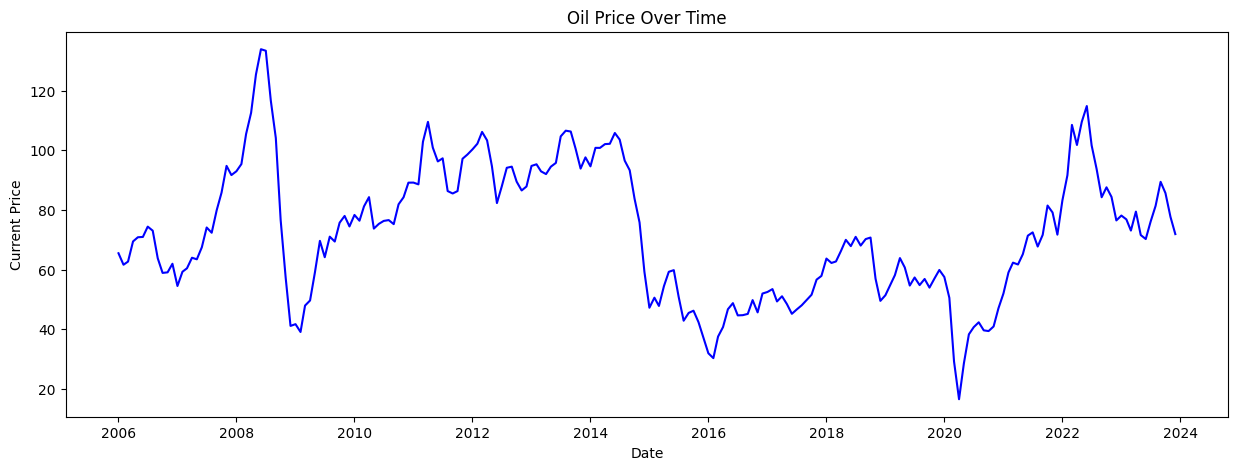

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Membuat plot
plt.plot(ts_train.index, ts_train['current_price'], color="b")
plt.xlabel('Date')
plt.ylabel('Current Price')
plt.title('Oil Price Over Time')

plt.show()


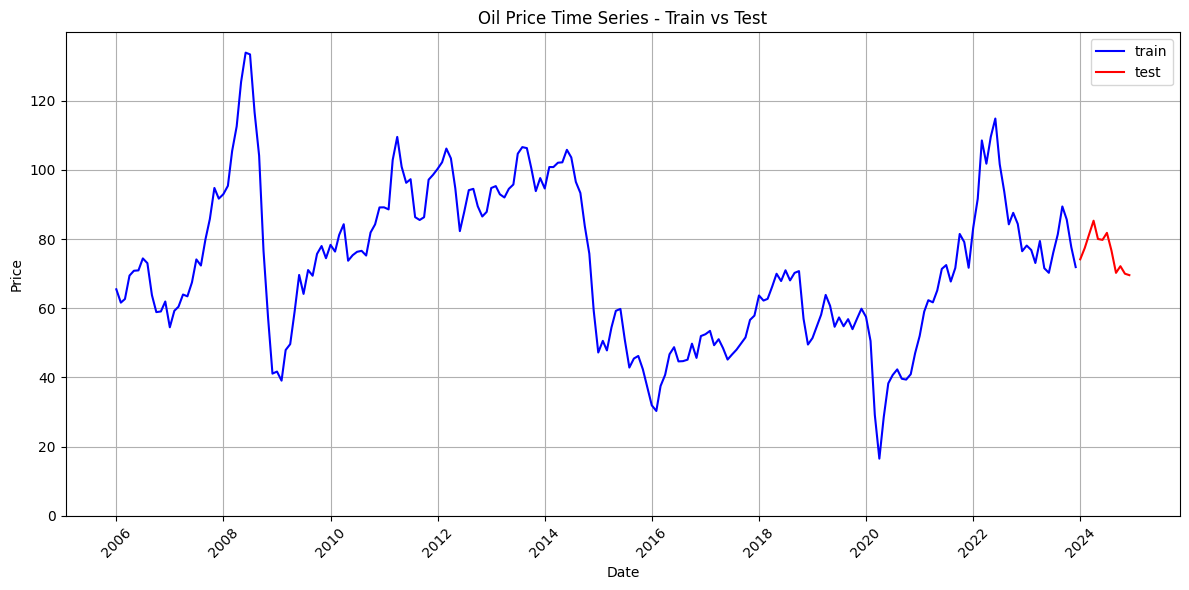

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ts_train.index, ts_train['current_price'], color='blue', label='train')
plt.plot(ts_test.index, ts_test['current_price'], color='red', label='test')

plt.grid(True)
plt.legend()
plt.title('Oil Price Time Series - Train vs Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
ts_train.columns

Index(['eur_usd', 'inventory', 'production', 'rigs', 'inflation',
       'price_6m_rolling', 'price_12m_rolling', 'price_6m_lag',
       'current_price'],
      dtype='object')

In [ ]:
features = ['eur_usd', 'inventory', 'production', 'rigs', 'inflation', 'price_6m_rolling', 'price_12m_rolling', 'price_6m_lag']
target = 'current_price'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

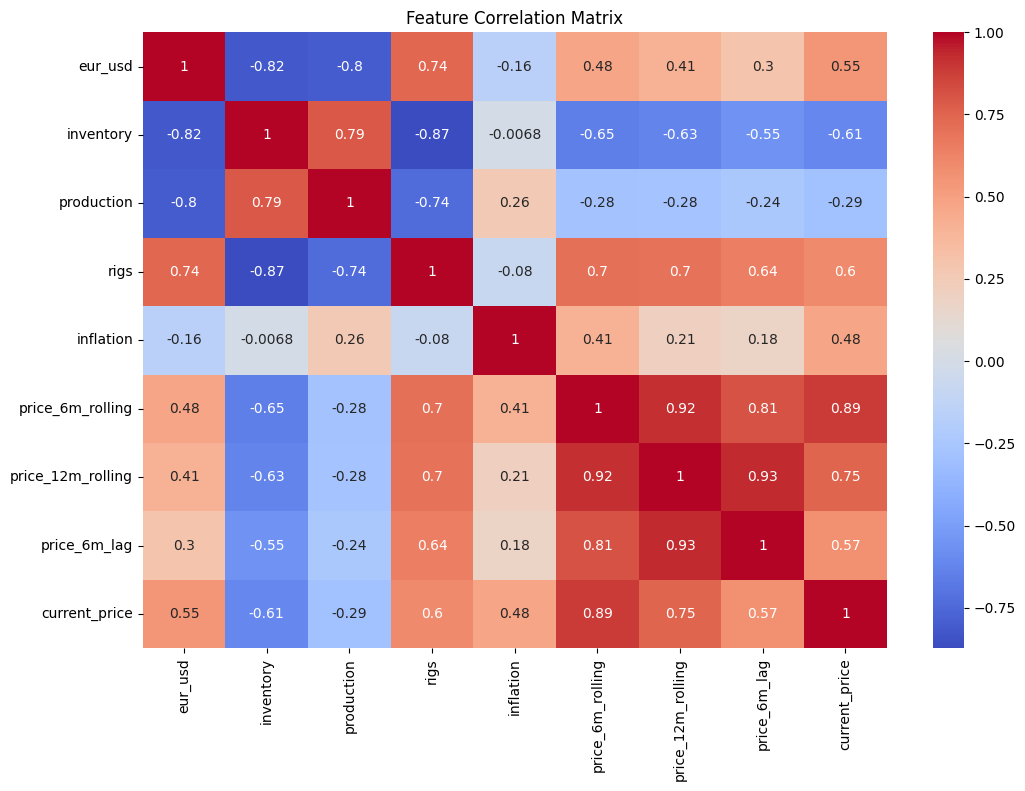

In [ ]:
# Visualisasi correlation matrix
plt.figure(figsize=(12, 8))
correlation = ts_train[features + [target]].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



In [ ]:
# Scaling data ( memisahkan scaling untuk features dan target)
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features_train = feature_scaler.fit_transform(ts_train[features])
scaled_target_train = target_scaler.fit_transform(ts_train[[target]])

scaled_features_test = feature_scaler.transform(ts_test[features])
scaled_target_test = target_scaler.transform(ts_test[[target]])

In [ ]:
def prepare_data_with_window(features, target, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(features) - n_steps_in - n_steps_out + 1):
        X.append(features[i:(i + n_steps_in)])
        y.append(target[i + n_steps_in:i + n_steps_in + n_steps_out])
    return np.array(X), np.array(y)


In [ ]:
n_steps_in = 5  # window size
n_steps_out = 1  # prediction horizon

X_train, y_train = prepare_data_with_window(scaled_features_train, scaled_target_train, n_steps_in, n_steps_out)
X_test, y_test = prepare_data_with_window(scaled_features_test, scaled_target_test, n_steps_in, n_steps_out)

# Reshape untuk LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

In [ ]:
tf.keras.utils.set_random_seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Konfigurasi sesi TensorFlow
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [ ]:
# Callback custom untuk menampilkan pesan saat early stopping
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        if hasattr(self.model, 'stop_training') and self.model.stop_training:
            print("\nTraining stopped early due to Early Stopping criteria being met.")


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',  # Ganti ekstensi ke .keras
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

In [ ]:
# Membangun model RNN
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(n_steps_in, len(features))),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(n_steps_out)
])

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,301 (130.08 KB)

 Trainable params: 33,301 (130.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Membuat prediksi
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


In [ ]:
# Melatih model final
history = model.fit(
        X_train, y_train,
        testing_data=(X_test, y_test),
        epochs=20,
        batch_size=64,
        callbacks=[early_stopping, model_checkpoint]
    )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - loss: 0.1449 - val_loss: 0.0132
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0372 - val_loss: 0.0196
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0391 - val_loss: 0.0126
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0287 - val_loss: 0.0034
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0218 - val_loss: 0.0147
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0229 - val_loss: 0.0093
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184 - val_loss: 0.0035
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0196 - val_loss: 0.0050
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0183 - val_loss: 0.0120


In [ ]:
train_loss = history.history['loss'][-1]
print(f'Nilai loss pada data training: {train_loss:.4f}')


Nilai loss pada data training: 0.0182


In [ ]:
# Membuat prediksi
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# Memastikan dimensi y_test sesuai untuk inverse_transform
if len(y_test.shape) == 3:
    y_test = y_test.reshape(-1, y_test.shape[-1])  # Menggabungkan dimensi pertama dan kedua

# Inverse transform actual values
y_test_original = target_scaler.inverse_transform(y_test)

# Memastikan dimensi predictions sesuai untuk inverse_transform
if len(predictions.shape) == 3:
    predictions = predictions.reshape(-1, predictions.shape[-1])  # Sama seperti y_test

# Inverse transform predictions
predictions_original = target_scaler.inverse_transform(predictions)


In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')



MSE: 46.59
RMSE: 6.83
MAE: 5.31
R2 Score: -1.12


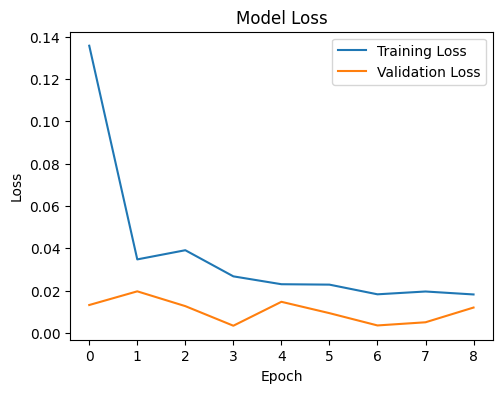

In [ ]:
# Visualisasi learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



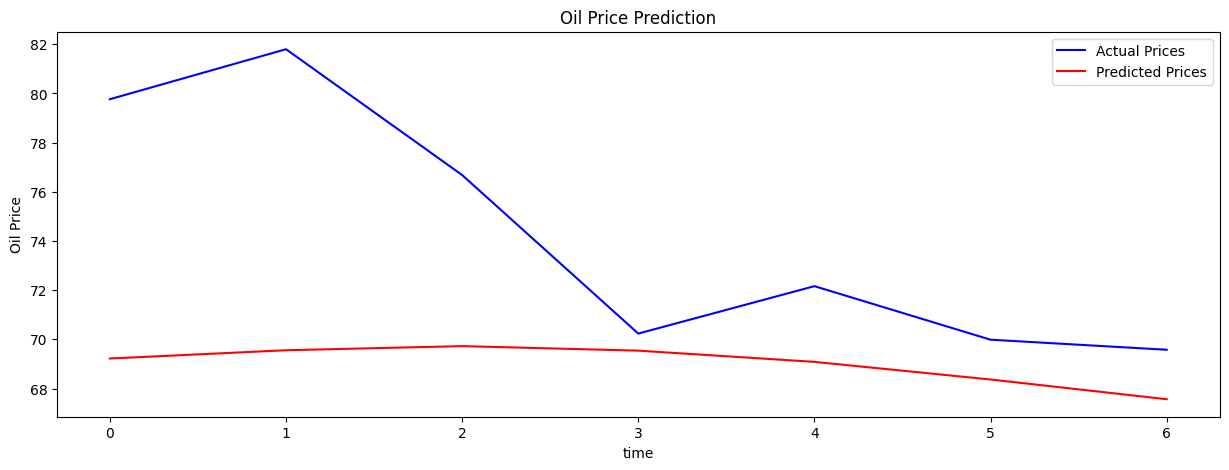

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(15, 5))
plt.plot(y_test_original, color='blue', label='Actual Prices')
plt.plot(predictions_original, color='red', label='Predicted Prices')
plt.xlabel('time')
plt.ylabel('Oil Price')
plt.title('Oil Price Prediction')
plt.legend()
plt.show()

In [ ]:
# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Menghitung akurasi model
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Percentage Error (MAPE): 6.82%
Model Accuracy: 93.18%
